### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Frame

In [85]:
df = pd.read_csv('D:\data cleaning\dirty_cafe_sales.csv')

### Data Exploration

In [86]:
pd.__version__

'2.2.3'

In [87]:
df.shape

(20002, 8)

In [88]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [89]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [90]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,20002,19335,19725,19643,19655,14843,13471,19683
unique,10002,11,8,9,20,6,5,368
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,2,2342,4026,4858,1958,4582,6044,318


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    20002 non-null  object
 1   Item              19335 non-null  object
 2   Quantity          19725 non-null  object
 3   Price Per Unit    19643 non-null  object
 4   Total Spent       19655 non-null  object
 5   Payment Method    14843 non-null  object
 6   Location          13471 non-null  object
 7   Transaction Date  19683 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


### Handling Null Values

In [92]:
df.isna().sum()

Transaction ID         0
Item                 667
Quantity             277
Price Per Unit       359
Total Spent          347
Payment Method      5159
Location            6531
Transaction Date     319
dtype: int64

In [93]:
# Item
df[df['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
30,TXN_1736287,NaN,5,2.0,10.0,Digital Wallet,NaN,2023-06-02
61,TXN_8051289,NaN,1,3.0,3.0,NaN,In-store,2023-10-09
72,TXN_6044979,NaN,1,1.0,1.0,Cash,In-store,2023-12-08
89,TXN_4132730,NaN,5,1.0,5.0,NaN,In-store,2023-03-12
...,...,...,...,...,...,...,...,...
19822,TXN_8751702,NaN,5,NaN,15.0,Cash,NaN,2023-02-13
19857,TXN_3740505,NaN,2,1.5,3.0,NaN,NaN,2023-11-21
19878,TXN_3105633,NaN,1,2.0,2.0,NaN,In-store,2023-03-30
19887,TXN_4659954,NaN,3,4.0,12.0,Credit Card,In-store,NaN


In [94]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea', 'Item'], dtype=object)

In [95]:
item_mode = df['Item'].mode()
item_mode

0    Juice
Name: Item, dtype: object

In [96]:
df['Item'] = df['Item'].fillna('UNKNOWN') 
df['Item'] = df['Item'].replace('ERROR', 'UNKNOWN')

In [97]:
df[df['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [98]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity             277
Price Per Unit       359
Total Spent          347
Payment Method      5159
Location            6531
Transaction Date     319
dtype: int64

In [99]:
df[df['Quantity'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,NaN,2023-03-30
341,TXN_2265316,Cookie,NaN,1.0,3.0,Credit Card,In-store,2023-12-29
376,TXN_6319728,Coffee,NaN,2.0,4.0,Credit Card,In-store,2023-07-18
412,TXN_4660753,Juice,NaN,3.0,3.0,Credit Card,Takeaway,2023-10-04
532,TXN_7533411,Cookie,NaN,1.0,1.0,Digital Wallet,In-store,2023-11-09
...,...,...,...,...,...,...,...,...
19636,TXN_8436045,Cake,NaN,3.0,15.0,Credit Card,NaN,2023-08-08
19846,TXN_4528914,Salad,NaN,5.0,5.0,ERROR,In-store,2023-08-06
19871,TXN_1975184,Coffee,NaN,2.0,UNKNOWN,Digital Wallet,NaN,2023-01-15
19889,TXN_8963470,Salad,NaN,5.0,10.0,NaN,In-store,2023-06-01


In [100]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan, 'Quantity'],
      dtype=object)

In [101]:
df= df[df['Quantity'] != 'Quantity' ].copy()

In [102]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [103]:
extra = ['ERROR', 'UNKNOWN']
df['Quantity'] = df['Quantity'].replace(extra,np.nan)

In [104]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', nan], dtype=object)

In [105]:
quan_data= df[~df['Quantity'].isna()]['Quantity'].astype(int)
quan_mean = quan_data.mean()
quan_median = quan_data.median()

In [106]:
print(quan_mean ,'\n',quan_median)

3.028463396702027 
 3.0


In [107]:
# Both are almost same because of this we replacing the null values with mean
df['Quantity'] = df['Quantity'].fillna(quan_mean)

In [108]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       359
Total Spent          347
Payment Method      5159
Location            6531
Transaction Date     319
dtype: int64

In [109]:
# Price Per Unit
df['Price Per Unit'].unique()

array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [110]:
df['Price Per Unit'] = df['Price Per Unit'].replace(extra,np.nan)

In [111]:
price_mode = df['Price Per Unit'].mode()[0]

In [112]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(price_mode)

In [113]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          347
Payment Method      5159
Location            6531
Transaction Date     319
dtype: int64

In [114]:
# Total Spent
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [115]:
df['Total Spent'].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [116]:
df['Total Spent'] = df['Total Spent'].replace(extra,np.nan)
df['Total Spent'] = df['Total Spent'].fillna(df['Quantity'].astype(int) * df['Price Per Unit'].astype(float))

In [117]:
df['Total Spent'].unique()

array(['4.0', '12.0', 4.0, '10.0', '20.0', '9.0', '16.0', '15.0', '25.0',
       '8.0', '5.0', '3.0', '6.0', 12.0, 2.0, 3.0, '2.0', 9.0, '1.0',
       '7.5', '4.5', '1.5', 6.0, 15.0, 20.0, 7.5, 10.0, 25.0, 8.0, 1.0,
       16.0, 1.5, 4.5, 5.0], dtype=object)

In [118]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      5159
Location            6531
Transaction Date     319
dtype: int64

In [119]:
# Payment Method
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [120]:
df['Payment Method'] = df['Payment Method'].replace('ERROR','UNKNOWN')
df['Payment Method'] = df['Payment Method'].fillna('UNKNOWN')

In [121]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method         0
Location            6531
Transaction Date     319
dtype: int64

In [122]:
# Location
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [123]:
df['Location'] = df['Location'].replace('ERROR','UNKNOWN')
df['Location'] = df['Location'].fillna('UNKNOWN')

In [124]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN'], dtype=object)

In [125]:
df.isna().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    319
dtype: int64

In [126]:
# Transaction Date
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [127]:
df['Transaction Date'] = df['Transaction Date'].replace(extra,np.nan)
df['Transaction Date'] = df['Transaction Date'].ffill()

In [128]:
df[df['Transaction Date'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [129]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

### Handling Inconsistencies

In [130]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
19997,TXN_7672686,Coffee,2,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
19998,TXN_9659401,UNKNOWN,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-06-02
19999,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02
20000,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-12-02


In [131]:
df["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'Juice', 'Tea'], dtype=object)

In [132]:
df["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet'], dtype=object)

In [133]:
df["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN'], dtype=object)

### Handling Duplicates

In [134]:
df['Transaction ID'].value_counts()

Transaction ID
TXN_9226047    2
TXN_8567525    2
TXN_4583012    2
TXN_6796890    2
TXN_9933628    2
              ..
TXN_7034554    2
TXN_4271903    2
TXN_4977031    2
TXN_1961373    2
=======        1
Name: count, Length: 10001, dtype: int64

In [135]:
df[df['Transaction ID'] == 'TXN_9226047']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9983,TXN_9226047,Smoothie,3,4.0,12.0,Cash,UNKNOWN,2023-12-30
19985,TXN_9226047,Smoothie,3,4.0,12.0,Cash,UNKNOWN,2023-12-30


In [136]:
# These are completely identical so I am droping them
df = df.drop_duplicates()

In [137]:
df['Transaction ID'].unique()

array(['TXN_1961373', 'TXN_4977031', 'TXN_4271903', ..., 'TXN_7695629',
       'TXN_6170729', '======='], dtype=object)

In [138]:
df=df[~(df['Transaction ID'] == '=======')]

In [139]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
9996,TXN_9659401,UNKNOWN,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-12-02


### Changing Data Types

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          10000 non-null  object
 3   Price Per Unit    10000 non-null  object
 4   Total Spent       10000 non-null  object
 5   Payment Method    10000 non-null  object
 6   Location          10000 non-null  object
 7   Transaction Date  10000 non-null  object
dtypes: object(8)
memory usage: 703.1+ KB


In [141]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'],errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'],errors= 'coerce')

In [142]:
df['Quantity'] = df['Quantity'].astype('int64')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 703.1+ KB


In [144]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  int64         
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 703.1+ KB


### Handling Outliers

<Axes: >

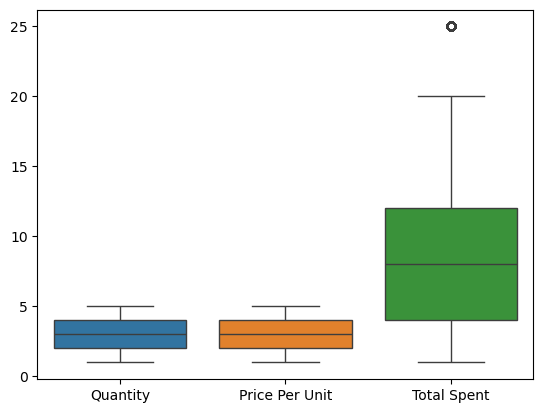

In [146]:
plt.Figure(figsize= (6,4))
sns.boxplot(df)

<Axes: xlabel='Total Spent', ylabel='Count'>

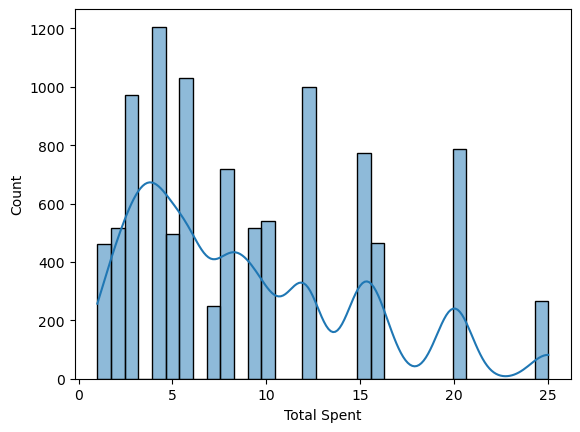

In [147]:
plt.Figure(figsize= (6,4))
sns.histplot(data = df, x='Total Spent',kde= True )

In [148]:
# Only one outlier
q1 =np.percentile(df['Total Spent'],25)
q3 =np.percentile(df['Total Spent'],75)
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf ,'\n',uf)

-8.0 
 24.0


In [149]:
q1

np.float64(4.0)

In [150]:
df.loc[df['Total Spent'] > uf,'Total Spent'] = uf

In [151]:
df.loc[df['Total Spent'] < lf] 

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


<Axes: >

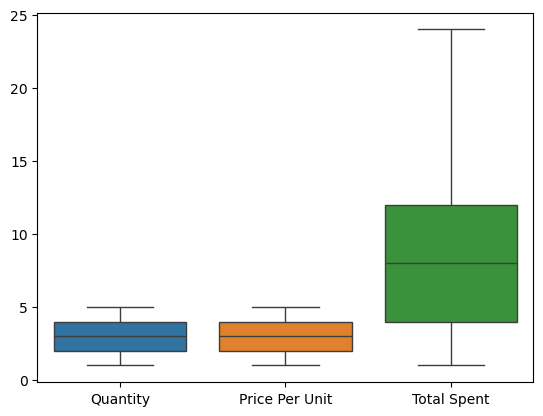

In [152]:
plt.Figure(figsize= (6,4))
sns.boxplot(df)

<Axes: xlabel='Total Spent', ylabel='Count'>

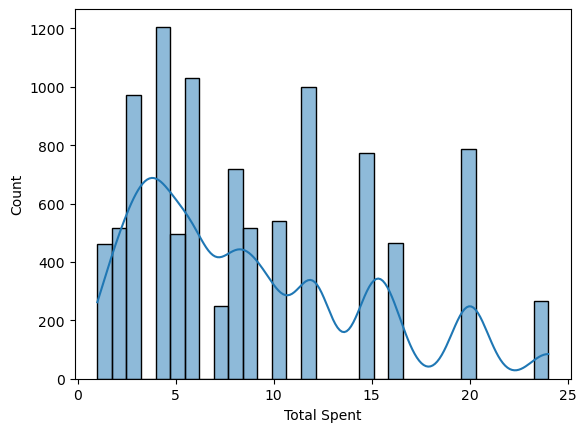

In [153]:
plt.Figure(figsize= (6,4))
sns.histplot(data = df, x='Total Spent',kde= True )

### Feature Engineering

In [154]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [155]:
### Ranking by total spend
df['Total Spent'].unique()

array([ 4. , 12. , 10. , 20. ,  9. , 16. , 15. , 24. ,  8. ,  5. ,  3. ,
        6. ,  2. ,  1. ,  7.5,  4.5,  1.5])

In [156]:
def ranking(x):
    if x > 0 and x <= 10 :
        return 'Low'
    elif x > 10 and x <= 20 :
        return 'Medium'
    elif x > 20 and x <= 24:
        return 'High'
    else :
        return 'UNKNOWN'
    
df['Category'] = df['Total Spent'].apply(ranking)

In [157]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Category
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,Low
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,Medium
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,Low
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,Low
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,Low
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30,Low
9996,TXN_9659401,UNKNOWN,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-06-02,Low
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02,Low
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-12-02,Low


In [160]:
# Finding the day
df['Day'] = df['Transaction Date'].dt.day_name()

In [161]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Category,Day
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,Low,Friday
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,Medium,Tuesday
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,Low,Wednesday
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,Low,Thursday
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,Low,Sunday
...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30,Low,Wednesday
9996,TXN_9659401,UNKNOWN,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-06-02,Low,Friday
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02,Low,Thursday
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-12-02,Low,Saturday


In [163]:
# Finding Month
df['Month'] = df['Transaction Date'].dt.month_name()

In [164]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Category,Day,Month
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,Low,Friday,September
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,Medium,Tuesday,May
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,Low,Wednesday,July
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,Low,Thursday,April
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,Low,Sunday,June
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30,Low,Wednesday,August
9996,TXN_9659401,UNKNOWN,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-06-02,Low,Friday,June
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02,Low,Thursday,March
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,UNKNOWN,2023-12-02,Low,Saturday,December
